## Objective: 
Use historical stock data to predict the next day's closing price.

In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


Loading stock Apple

In [3]:
# Select stock
stock_symbol = "AAPL"

# Download historical data
df = yf.download(stock_symbol, start="2020-01-01", end="2025-12-31")



[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763718,72.523746,71.539330,71.696160,146322800
2020-01-06,72.335571,72.374177,70.634554,70.885487,118387200
2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [5]:
df.shape

(1507, 5)

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1507.000000,1507.000000,1507.000000,1507.000000,1.507000e+03
mean,164.870690,166.554967,163.018727,164.708612,8.457531e+07
std,49.658739,49.950403,49.314899,49.613538,5.136011e+07
min,54.264339,55.263190,51.420161,55.161612,1.791060e+07
25%,131.416794,132.850233,130.053221,131.765474,5.077930e+07
50%,163.345596,165.337266,162.026368,163.585297,7.040420e+07
75%,197.145859,199.314363,194.668966,196.835582,1.005777e+08
max,286.190002,288.619995,283.299988,286.200012,4.265100e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1507 entries, 2020-01-02 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1507 non-null   float64
 1   (High, AAPL)    1507 non-null   float64
 2   (Low, AAPL)     1507 non-null   float64
 3   (Open, AAPL)    1507 non-null   float64
 4   (Volume, AAPL)  1507 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.6 KB


Feature Selection

In [8]:
# Create target variable (next day close)
df['Target'] = df['Close'].shift(-1)

# Drop last row (NaN target)
df.dropna(inplace=True)

# Features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']


Train–Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


Train the Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Model Evaluation

In [11]:
y_pred = model.predict(X_test)


In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 2.95
RMSE: 4.27


Visualization: Actual vs Predicted Prices

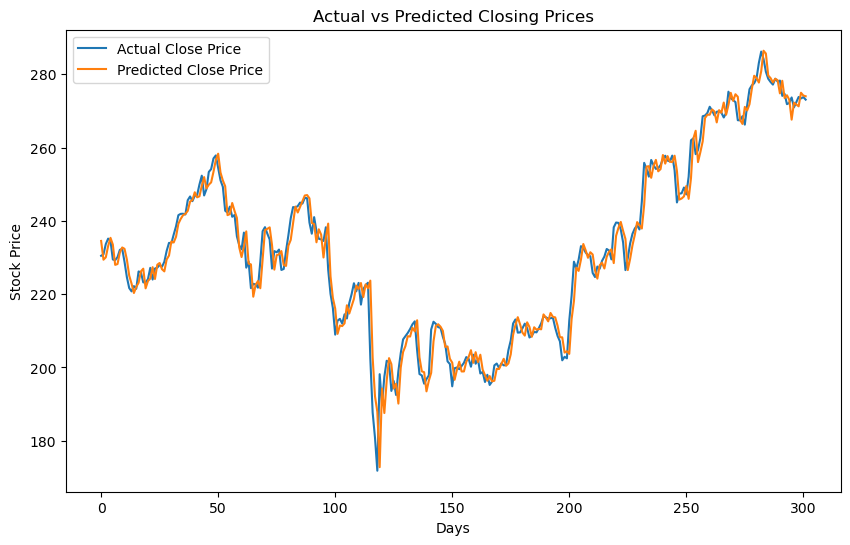

In [13]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Closing Prices")
plt.legend()
plt.show()


## Key Results and Findings

The model successfully captures short-term trends in Apple’s stock prices.
Predicted closing prices closely follow the actual values for most trading days.
Prediction errors occur during periods of high volatility, which is common in stock markets.
Visualization of actual vs predicted prices shows a strong correlation, indicating effective learning.